In [ ]:
import numpy as np
import pandas as pd 
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#importing dataset

data = pd.read_csv("/content/gdrive/MyDrive/DataSet/Housing.csv")
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


Performing Below Visualizations.

● Univariate Analysis

● Bi-Variate Analysis

● Multi-Variate Analysis

# **● Univariate Analysis**

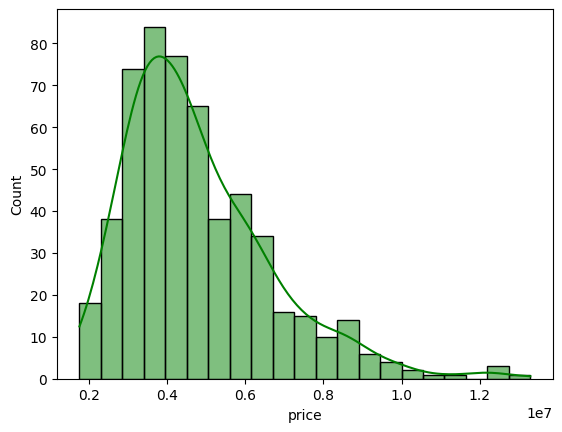

In [ ]:
# Ploting the histogram for the 'Price' attribute
sns.histplot(data['price'], kde=True,color='green')
sns.set_style("whitegrid")
plt.show()

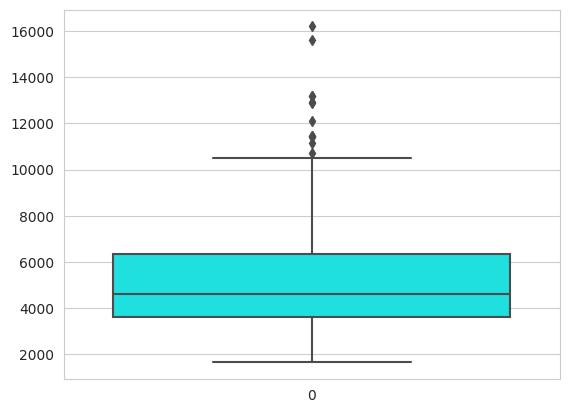

In [ ]:
sns.boxplot(data['area'],color='aqua')
sns.set_style("whitegrid")
sns.set_style("white")
plt.show()

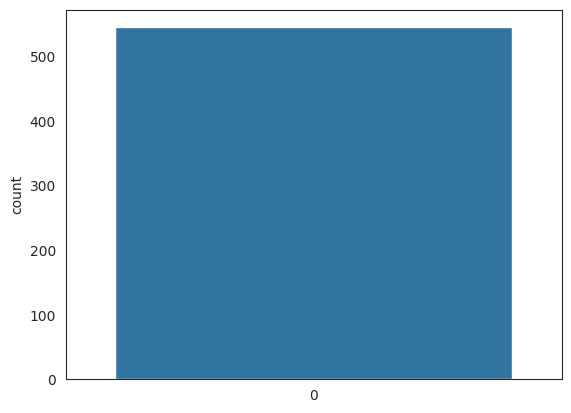

In [ ]:
sns.countplot(data['bedrooms'])
plt.show()

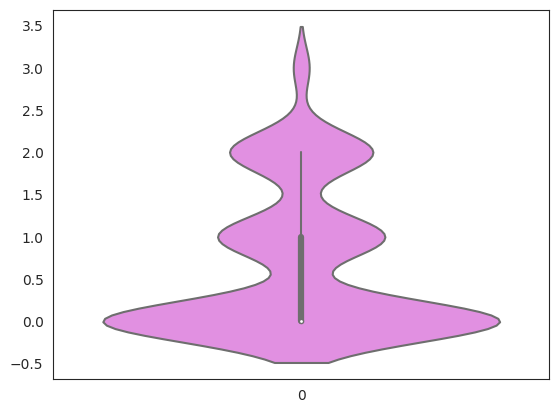

In [ ]:
sns.violinplot(data['parking'],color='violet')
sns.set_style('darkgrid')
plt.show()

# **Bi-Variate Analysis**

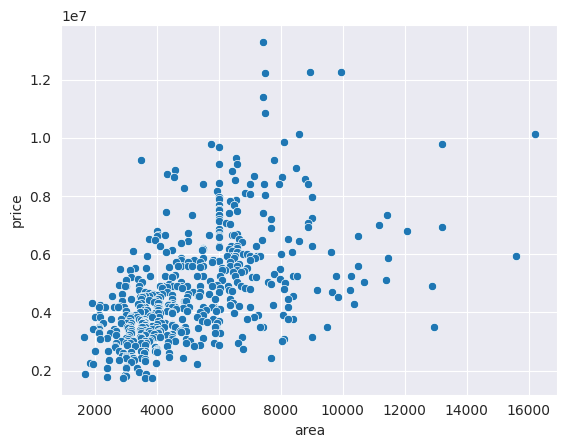

In [ ]:
#Ploting a scatter plot between 'Price' and 'Area'
sns.scatterplot(x='area', y='price', data=data)
plt.show()

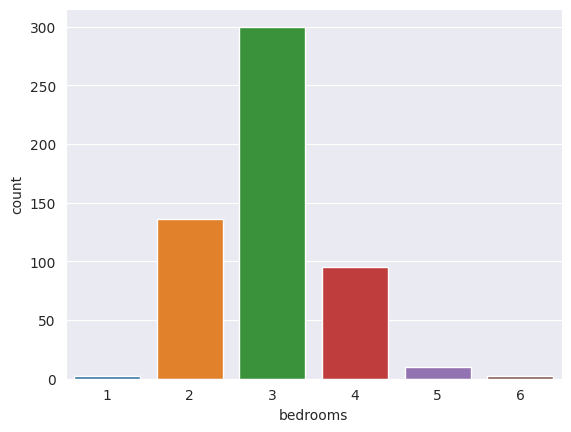

In [ ]:
# Create a count plot of 'Price' and 'Bedrooms'
sns.countplot(data=data, x='bedrooms')
plt.show()

Text(0, 0.5, 'Price')

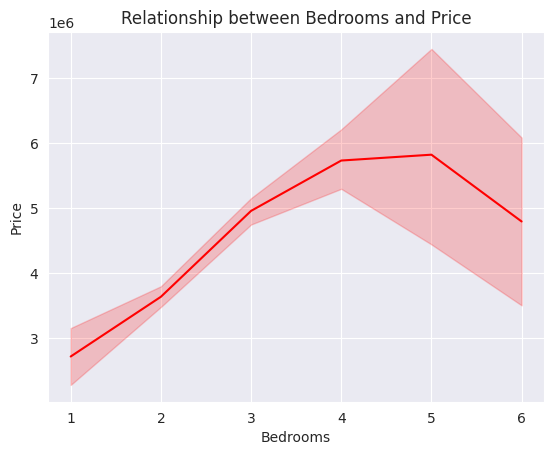

In [ ]:
# Createing a line plot of 'bedrooms' and 'price'
sns.lineplot(data=data, x='bedrooms', y='price',color='red')
sns.set_style('dark')
# Set plot title and axis labels
plt.title("Relationship between Bedrooms and Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")


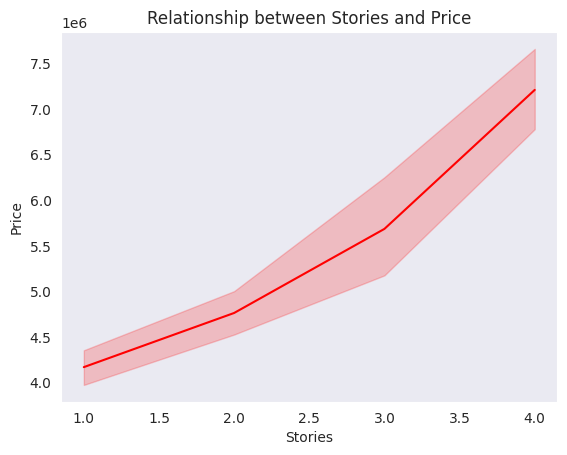

In [ ]:
# Creating a scatter plot of 'stories' and 'price'
sns.lineplot(data=data, x='stories', y='price',color='red')
sns.set_style("darkgrid")
plt.title("Relationship between Stories and Price")
plt.xlabel("Stories")
plt.ylabel("Price")
plt.show()

# Multi-Variate Analysis

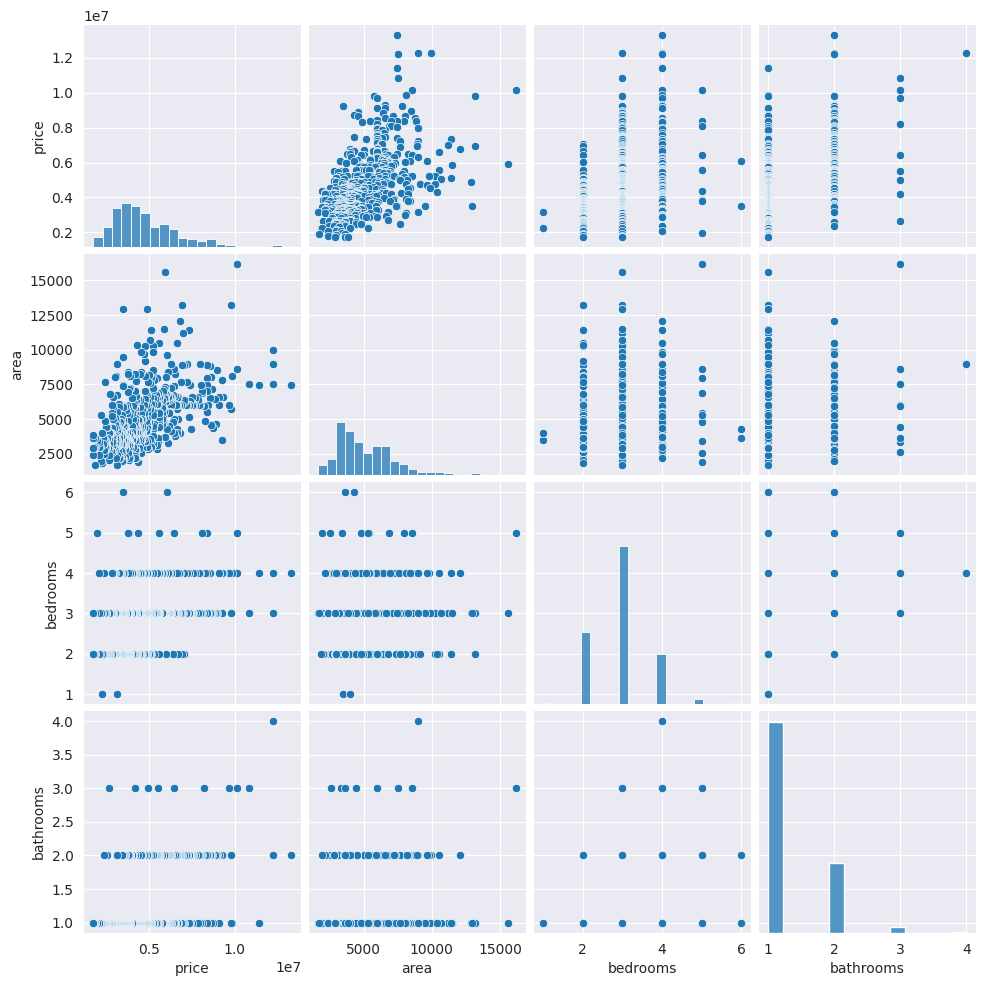

In [ ]:
sns.pairplot(data=data, vars=["price", "area", "bedrooms", "bathrooms"])

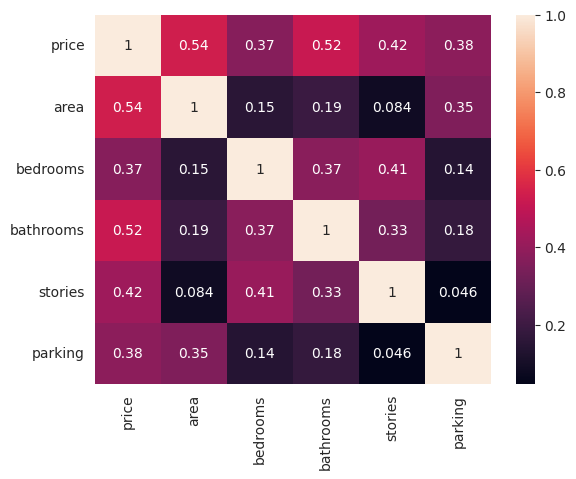

In [ ]:
corr_matrix = data[["price", "area", "bedrooms", "bathrooms", "stories", "parking"]].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

<Axes: xlabel='bedrooms', ylabel='price'>

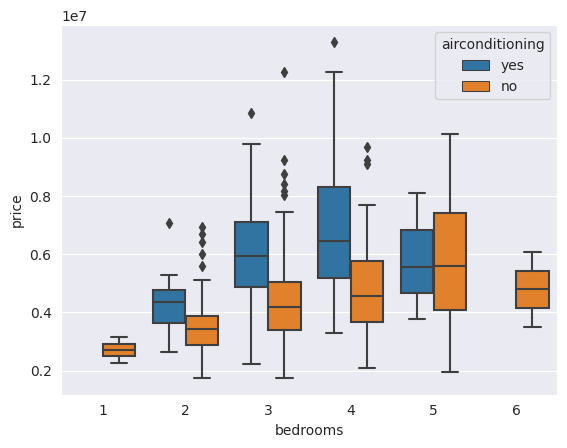

In [ ]:
sns.boxplot(x="bedrooms", y="price", hue="airconditioning", data=data)


# **Perform descriptive statistics on the dataset.**

In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,-5.450000e+02,-545.000000,-545.000000,-545.000000,-545.000000,-545.000000
mean,-4.766729e+06,-5150.541284,-2.965138,-1.286239,-1.805505,-0.693578
std,-1.870440e+06,-2170.141023,-0.738064,-0.502470,-0.867492,-0.861586
min,-1.750000e+06,-1650.000000,-1.000000,-1.000000,-1.000000,-0.000000
25%,-3.430000e+06,-3600.000000,-2.000000,-1.000000,-1.000000,-0.000000
50%,-4.340000e+06,-4600.000000,-3.000000,-1.000000,-2.000000,-0.000000
75%,-5.740000e+06,-6360.000000,-3.000000,-2.000000,-2.000000,-1.000000
max,-1.330000e+07,-16200.000000,-6.000000,-4.000000,-4.000000,-3.000000


# **Check for Missing values and deal with them.**

In [ ]:
data.isnull().any()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
furnishingstatus    False
dtype: bool

In [ ]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [ ]:
data.duplicated().sum()

0

# **Checking for Categorical columns and perform encoding.**

In [ ]:
# Select categorical columns
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

# Perform One-Hot Encoding
df_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)

# Display the encoded dataframe
print(df_encoded.head())

      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2             1   
1  12250000  8960         4          4        4        3             1   
2  12250000  9960         3          2        2        2             1   
3  12215000  7500         4          2        2        3             1   
4  11410000  7420         4          1        2        2             1   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0              0             0                    0                    1   
1              0             0                    0                    1   
2              0             1                    0                    0   
3              0             1                    0                    1   
4              1             1                    0                    1   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                              

##  Splitting the data into independent and dependent variables

In [ ]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [ ]:
X.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,1,0,0,0,1,0,0
1,8960,4,4,4,3,1,0,0,0,1,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,0
3,7500,4,2,2,3,1,0,1,0,1,0,0
4,7420,4,1,2,2,1,1,1,0,1,0,0


In [ ]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

# **Scale the independent**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
print(X_scaled)

[[ 1.04672629  1.40341936  1.42181174 ...  1.4726183  -0.84488844
  -0.6964292 ]
 [ 1.75700953  1.40341936  5.40580863 ...  1.4726183  -0.84488844
  -0.6964292 ]
 [ 2.21823241  0.04727831  1.42181174 ... -0.67906259  1.18358821
  -0.6964292 ]
 ...
 [-0.70592066 -1.30886273 -0.57018671 ... -0.67906259 -0.84488844
   1.43589615]
 [-1.03338891  0.04727831 -0.57018671 ... -0.67906259 -0.84488844
  -0.6964292 ]
 [-0.5998394   0.04727831 -0.57018671 ... -0.67906259 -0.84488844
   1.43589615]]


# **Spliting the data into training and testing**

In [ ]:
  from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


# **Build the Model**

In [ ]:
from sklearn.linear_model import LinearRegression
# Creating the linear regression object
reg = LinearRegression()

# Training the model using the training sets
reg.fit(X_train, y_train)


LinearRegression()

# working with the builded model 

In [ ]:
new_data = pd.DataFrame({
    'area': [1500, 2000, 2500],
    'bedrooms': [3, 4, 5],
    'bathrooms': [2, 3, 4],
    'stories': [2, 3, 4],
    'parking': [2, 3, 4],
    'mainroad_yes': [1, 0, 1],
    'guestroom_yes': [0, 1, 0],
    'basement_yes': [1, 0, 1],
    'hotwaterheating_yes': [0, 1, 0],
    'airconditioning_yes': [1, 0, 1],
    'furnishingstatus_semi-furnished': [1, 0, 0],
    'furnishingstatus_unfurnished': [0, 1, 0]
})

In [ ]:
new_data_scaled = scaler.transform(new_data)

In [ ]:
predictions = reg.predict(new_data_scaled)

In [ ]:
print(predictions)

[ 5969508.89970984  6868647.22395154 10179077.76337367]


# **Measure the performance using Metrics.**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# make predictions on the test set
y_pred = reg.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# calculate the root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 1642216436387.4143
Root Mean Squared Error: 1281489.9283207085
R-squared: 0.6186560032411084
